In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
data_aku = pd.read_excel(r"C:\Users\Damida Shu Mudita\Documents\projek/Data_train.xlsx")

In [121]:
data_aku.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [122]:
data_aku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [123]:
data_aku.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [89]:
data_aku[data_aku["Route"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [90]:
data_aku[data_aku["Total_Stops"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [91]:
data_aku.dropna(inplace=True)

In [92]:
data_aku.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [93]:
data = data_aku.copy()

In [94]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [95]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [96]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [97]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [98]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [99]:
for feature in ['Dep_Time', 'Arrival_Time', 'Date_of_Journey']:
    change_into_Datetime(feature)

In [100]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [101]:
data["Journey_day"] = data['Date_of_Journey'].dt.day

In [102]:
data["Journey_month"] = data['Date_of_Journey'].dt.month

In [103]:
data["Journey_year"] = data['Date_of_Journey'].dt.year

In [104]:
def extract_hour_min(df, col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(3)

In [105]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2026-01-15 22:20:00,2026-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2026-01-15 05:50:00,2026-01-15 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019


In [106]:
extract_hour_min(data , "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2026-01-15 22:20:00,2026-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2026-01-15 05:50:00,2026-01-15 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2026-01-15 09:25:00,2026-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25


In [107]:
extract_hour_min(data , "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2026-01-15 22:20:00,2026-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2026-01-15 05:50:00,2026-01-15 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2026-01-15 09:25:00,2026-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [108]:
cols_to_drop = ["Arrival_Time" , "Dep_Time"]

data.drop(cols_to_drop, axis=1, inplace=True)

In [109]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

In [110]:
def Flight_Dep_Time(x):
    if (x>4) and (x<=8):
        return "Early Morning"
    elif (x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return "Noon"
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return "Late Night"

In [111]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10


In [112]:
data['Dep_Time_hour'].apply(Flight_Dep_Time).value_counts()

Dep_Time_hour
Early Morning    2880
Evening          2357
Morning          2209
Noon             1731
Night            1040
Late Night        465
Name: count, dtype: int64

<Axes: xlabel='Dep_Time_hour'>

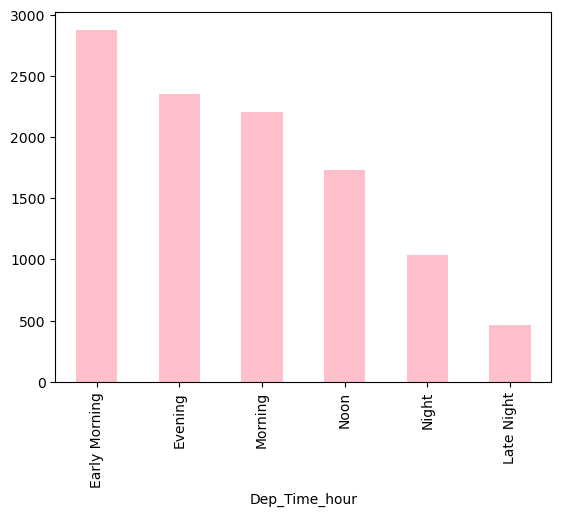

In [113]:
data['Dep_Time_hour'].apply(Flight_Dep_Time).value_counts().plot(kind="bar" , color="pink")

In [114]:
%pip install plotly
%pip install chart_studio

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [115]:
%pip install plotly --upgrade
%pip install cufflinks --upgrade

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [116]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot , iplot , init_notebook_mode , download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()


In [117]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10


In [118]:
data['Dep_Time_hour'].apply(Flight_Dep_Time).value_counts().iplot(kind="bar" , color="pink")

ValueError: 
    Invalid value of type 'builtins.str' received for the 'color' property of bar.marker.line
        Received value: 'rgba(255, 0, 136, np.float64(1.0))'

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color: see https://plotly.com/python/css-colors/ for a list
      - A number that will be interpreted as a color
        according to bar.marker.line.colorscale
      - A list or array of any of the above

<Axes: xlabel='Dep_Time_hour'>

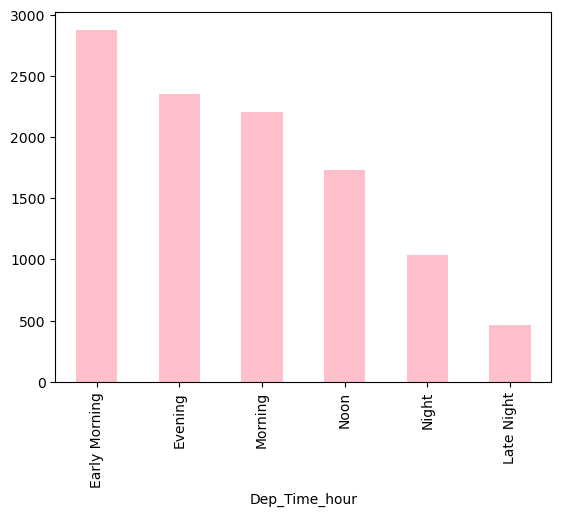

In [124]:
data['Dep_Time_hour'].apply(Flight_Dep_Time).value_counts().plot(kind="bar" , color="pink")

In [125]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

In [126]:
data["Duration"]

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [127]:
def preprocess_duration(x):
    if "h" not in x:
        x = "0h" + " " + x
    elif "m" not in x:
        x = x + " " + "0m"
    return x

data["Duration"] = data["Duration"].apply(preprocess_duration)
data["Duration"]

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [128]:
data["Duration"].apply(preprocess_duration)
data["Duration"]

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [129]:
data["Duration_hours"] = data["Duration"].apply(lambda x : int(x.split(' ')[0][0:-1]))

In [130]:
data["Duration_mins"] = data["Duration"].apply(lambda x : int(x.split(' ')[1][0:-1]))

In [131]:
data["Duration"]

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [132]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50


In [133]:
data["Duration_Total_mins"] = data["Duration"].str.replace("h" , "*60").str.replace(" " , "+").str.replace("m" , "*1").apply(eval)
data["Duration_Total_mins"]

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_Total_mins, Length: 10682, dtype: int64

<Axes: xlabel='Duration_Total_mins', ylabel='Price'>

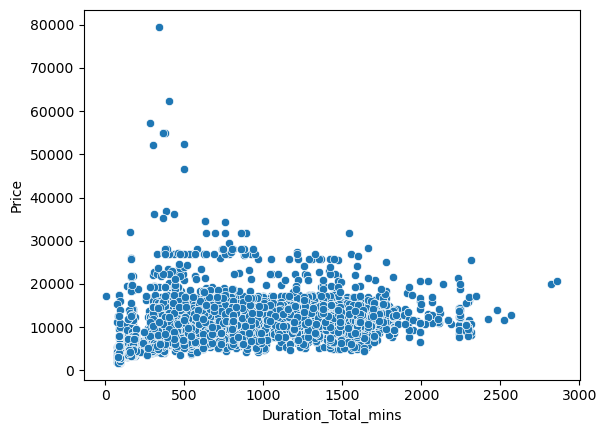

In [134]:
sns.scatterplot(x="Duration_Total_mins" , y="Price" , data=data)

<Axes: xlabel='Duration_Total_mins', ylabel='Price'>

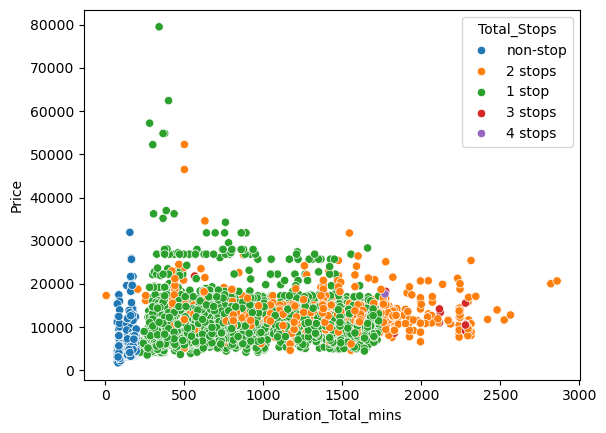

In [135]:
sns.scatterplot(x="Duration_Total_mins" , y="Price" , hue="Total_Stops" , data=data)

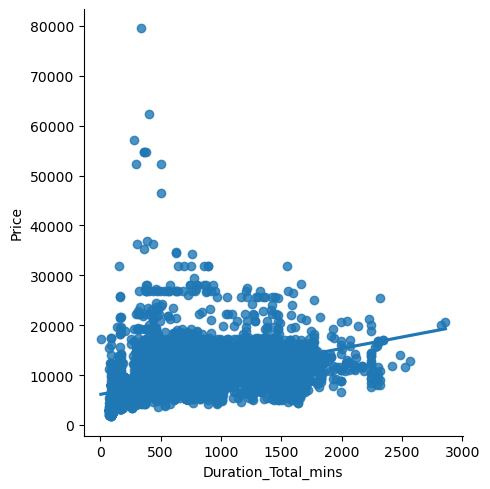

In [136]:
sns.lmplot(x="Duration_Total_mins" , y="Price" , data=data)

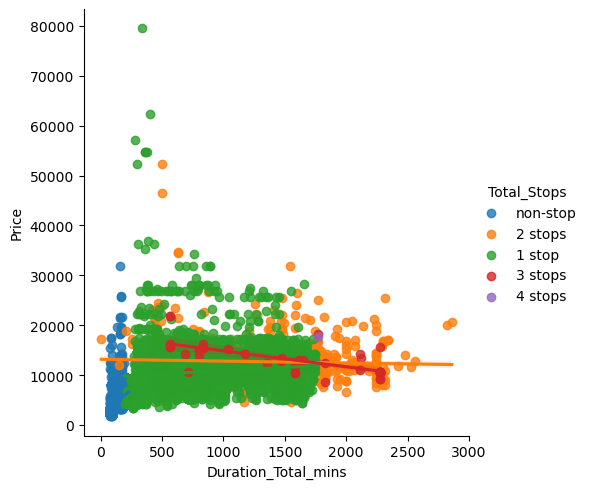

In [137]:
sns.lmplot(x="Duration_Total_mins" , y="Price" , hue="Total_Stops" , data=data)

In [138]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_Total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170


In [139]:
# data["Airline"]=="Jet Airways"

In [140]:
# data[data["Airline"]=="Jet Airways"].groupby("Route").size().sort_values(ascending=False)

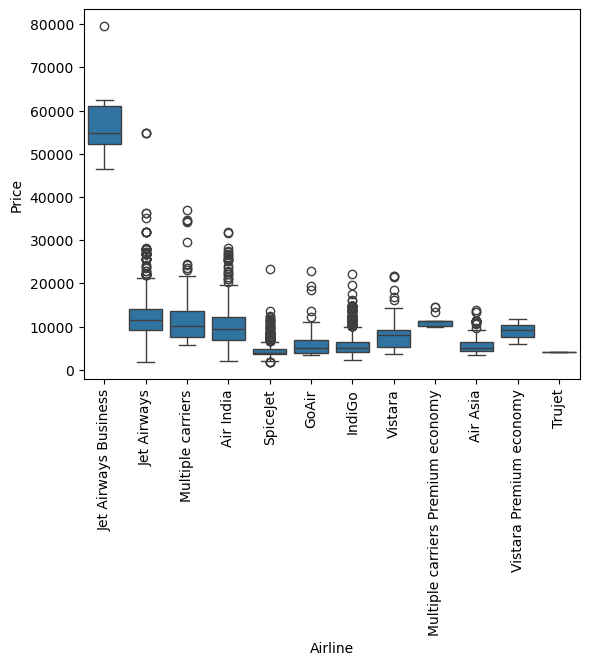

In [141]:
sns.boxplot(x="Airline" , y="Price" , data=data.sort_values("Price" , ascending=False))
plt.xticks(rotation="vertical")
plt.show()

<Axes: xlabel='Price', ylabel='Airline'>

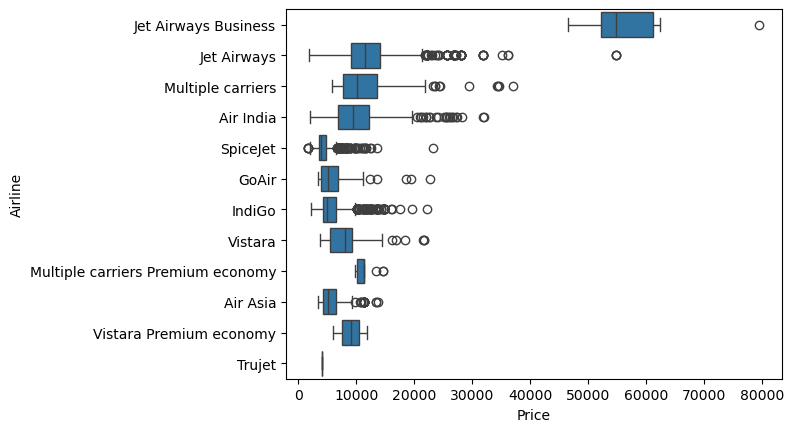

In [142]:
sns.boxplot(y="Airline" , x="Price" , data=data.sort_values("Price" , ascending=False))

### FEATURE ENGINEERING ###

In [143]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_Total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170


In [144]:
for sub_category in data["Source"].unique():
    data["Source_"+sub_category] = data["Source"].apply(lambda x : 1 if x==sub_category else 0)

In [145]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_Total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0


In [146]:
data["Airline"].nunique()

12

In [147]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_Total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0


In [148]:
# data.groupby(["Airline"])["Price"].mean().sort_values()

In [149]:
# data.head(1)

In [150]:
# airlines = data.groupby(["Airline"])["Price"].mean().sort_values()

In [151]:
# data.head(1)

In [152]:
# airlines

In [153]:
# dict_airlines = {key:index for index , key in enumerate(airlines , 0)}

In [154]:
# data.head(1)

In [155]:
# dict_airlines

In [156]:
# data["Airline"] = data["Airline"].map(dict_airlines)
# data["Airline"]

In [157]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_Total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0


In [158]:
airlines = data.groupby(["Airline"])["Price"].mean().sort_values()

In [159]:
airline_names = airlines.index

In [160]:
dict_airlines = {airline: idx for idx, airline in enumerate(airline_names, 0)}

In [161]:
data["Airline"] = data["Airline"].map(dict_airlines)

In [162]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_Total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0


In [163]:
data["Airline"]

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [164]:
data["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [165]:
data["Destination"].replace("New Delhi" , "Delhi" , inplace=True)

In [166]:
data["Destination"].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [167]:
dest = data.groupby(["Destination"])["Price"].mean().sort_values()

In [168]:
dest_names = dest.index

In [169]:
dict_dest = {dest: idx for idx, dest in enumerate(dest_names, 0)}

In [170]:
data["Destination"] = data["Destination"].map(dict_dest)

In [171]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_Total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [172]:
data["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [173]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [174]:
data["Total_Stops"] = data["Total_Stops"].map(stop)

In [175]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_Total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0


In [176]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_Total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [177]:
data.drop(columns=["Date_of_Journey" , "Additional_Info" , "Source" , "Journey_year" , "Route"] , axis=1 , inplace=True)

In [178]:
data.columns

Index(['Airline', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_Total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [179]:
data.drop(columns=["Route"] , axis=1 , inplace=True)

KeyError: "['Route'] not found in axis"

In [180]:
data.columns

Index(['Airline', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_Total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [181]:
data.drop(columns=["Duration"] , axis=1 , inplace=True)

In [182]:
data.columns

Index(['Airline', 'Destination', 'Total_Stops', 'Price', 'Journey_day',
       'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_Total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [183]:
data.head(1)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_Total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,170,1,0,0,0,0


### CHECKING OUTLIERS ###

In [184]:
def plot(df, col):
    fig, (ax1 , ax2 , ax3) = plt.subplots(3,1)

    sns.distplot(df[col] , ax=ax1)
    sns.boxplot(df[col] , ax=ax2)
    sns.distplot(df[col] , ax=ax3 , kde=False)

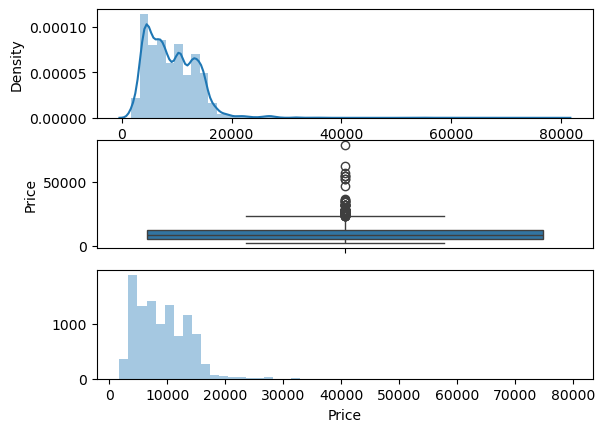

In [185]:
plot(data , "Price")

In [186]:
q1 = data["Price"].quantile(0.25)
q3 = data["Price"].quantile(0.75)

iqr = q3 - q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [187]:
print(maximum)

23017.0


In [188]:
print(minimum)

-5367.0


In [189]:
print([price for price in data["Price"] if price > maximum or price < minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [190]:
len([price for price in data["Price"] if price > maximum or price < minimum])

94

In [191]:
data["Price"] = np.where(data["Price"]>=35000 , data["Price"].median() , data["Price"])

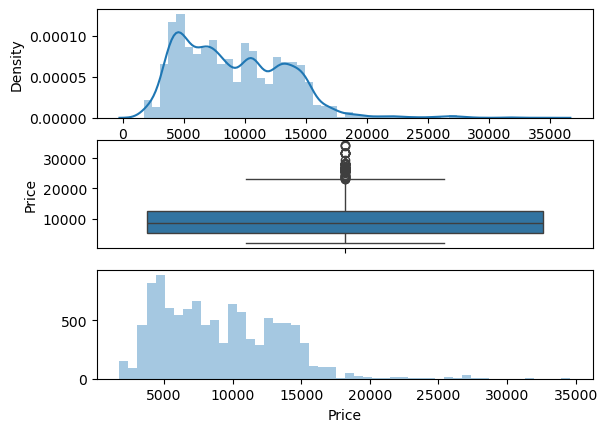

In [192]:
plot(data , "Price")

In [193]:
X = data.drop(["Price"] , axis=1)

In [194]:
y = data["Price"]

In [195]:
from sklearn.feature_selection import mutual_info_regression

In [196]:
imp = mutual_info_regression(X , y)

In [197]:
imp

array([1.31208971, 1.06530826, 0.7859779 , 0.37339337, 0.62116087,
       0.92517061, 0.76055162, 1.14461067, 0.90834432, 1.12314098,
       0.67595723, 1.77375731, 0.39448423, 0.46287146, 0.51654421,
       0.12734029, 0.19128509])

In [198]:
imp_df = pd.DataFrame(imp , index=X.columns)

In [199]:
imp_df.columns = ["Importance"]

In [200]:
imp_df

,Importance
Airline,1.312090
Destination,1.065308
Total_Stops,0.785978
Journey_day,0.373393
Journey_month,0.621161
Dep_Time_hour,0.925171
Dep_Time_minute,0.760552
Arrival_Time_hour,1.144611
Arrival_Time_minute,0.908344
Duration_hours,1.123141


In [201]:
imp_df.sort_values(by = "Importance" , ascending=False)

,Importance
Duration_Total_mins,1.773757
Airline,1.312090
Arrival_Time_hour,1.144611
Duration_hours,1.123141
Destination,1.065308
Dep_Time_hour,0.925171
Arrival_Time_minute,0.908344
Total_Stops,0.785978
Dep_Time_minute,0.760552
Duration_mins,0.675957


In [202]:
from sklearn.model_selection import train_test_split

In [203]:
X_train , X_test , y_train , y_test = train_test_split(
    X , y , test_size=0.25 , random_state=42
)

In [204]:
from sklearn.ensemble import RandomForestRegressor

In [205]:
ml_model = RandomForestRegressor()

In [206]:
ml_model.fit(X_train , y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [207]:
y_pred = ml_model.predict(X_test)

In [208]:
y_pred

array([16832.09,  5556.9 ,  8808.54, ...,  3616.02,  6245.1 ,  6896.81],
      shape=(2671,))

Test ML Model

In [209]:
from sklearn import metrics

In [210]:
metrics.r2_score(y_test , y_pred)

#hasilnya kan 0,81 sekian, itu artinya akurasinya 81% an

0.8184182789660561

Save Model => pake cara dumping

In [211]:
import pickle

In [212]:
file = open(r"C:\Users\Damida Shu Mudita\Documents\projek/rf_random.pkl" , "wb")

In [213]:
pickle.dump(ml_model , file)

In [214]:
model = open(r"C:\Users\Damida Shu Mudita\Documents\projek/rf_random.pkl" , "rb")

In [215]:
forest = pickle.load(model)

In [216]:
y_pred2 = forest.predict(X_test)

In [217]:
metrics.r2_score(y_test , y_pred2)

#hasilnya kan 0,81 sekian, itu artinya akurasinya 81% an

0.8184182789660561

Make my own metric

In [218]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [219]:
mape(y_test , y_pred)

np.float64(13.162873398468092)

automate papeline

In [220]:
from sklearn import metrics

In [221]:
def predict(ml_model):
    model = ml_model.fit(X_train , y_train)
    print('Training score : {}'.format(model.score(X_train , y_train)))
    y_predection = model.predict(X_test)
    print('predictions are : {}'.format(y_predection))
    print('\n')
    r2_score = metrics.r2_score(y_test , y_predection)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test , y_predection)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test , y_predection)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test , y_predection))))
    print('MAPE : {}'.format(mape(y_test , y_predection)))
    sns.distplot(y_test - y_predection)

Training score : 0.9510284407408665
predictions are : [16891.24  5537.21  8719.3  ...  3548.23  6164.08  6875.41]


r2 score : 0.8170501190631048
MAE : 1164.109870421874
MSE : 3561595.040917587
RMSE : 1887.2188640742195
MAPE : 13.123030258690132


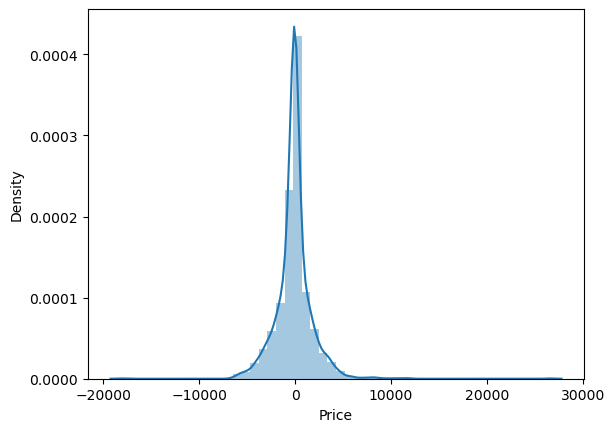

In [222]:
predict(RandomForestRegressor())

In [223]:
from sklearn.tree import DecisionTreeRegressor

Training score : 0.966591628243878
predictions are : [16840.  4959.  8610. ...  3419.  5797.  6818.]


r2 score : 0.7396979867744177
MAE : 1336.4238737052292
MSE : 5067455.385581139
RMSE : 2251.100927453307
MAPE : 15.056116601562275


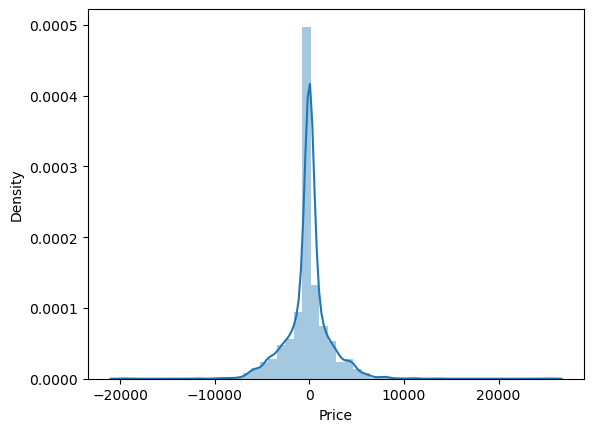

In [224]:
predict(DecisionTreeRegressor())

hypertune ml model

In [225]:
from sklearn.model_selection import RandomizedSearchCV

In [226]:
reg_rf = RandomForestRegressor()

In [227]:
np.linspace(start =100 , stop=1200 , num=6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [228]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100 , stop=1200 , num=6)]

# Number of features to consider at every split
max_features = ["auto", "sqrt"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start =5 , stop=30 , num=4)]

# Minimum number of samples required to split a node
min_samples_split = [5,10,15,100]


In [229]:
# Create the random grid or hyper-parameter space

random_grid = {
    'n_estimators' : n_estimators , 
    'max_features' : max_features , 
    'max_depth' : max_depth , 
    'min_samples_split' : min_samples_split
}

In [230]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [231]:
rf_random = RandomizedSearchCV(estimator=reg_rf , param_distributions=random_grid , cv=3 , n_jobs=-1 , verbose=2)

In [232]:
rf_random.fit(X_train , y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


,estimator,RandomForestRegressor()
,param_distributions,"{'max_depth': [5, 13, ...], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [5, 10, ...], 'n_estimators': [100, 320, ...]}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [233]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 21}

In [234]:
rf_random.best_estimator_

,n_estimators,1200
,criterion,'squared_error'
,max_depth,21
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [235]:
rf_random.best_score_

np.float64(0.7994602556617995)